In [213]:
# Title:     HousePy_Group5_V3
# Authors:   Aline J
# Date:      09/09/19
# Goal:      Analysis of the housing market in the Houston Area from 2015-2017
# Questions: 
#1) Which market areas have properties with more/less days  in the market
#2) Which are the drivers of housing Market in the Houston Area from 2015-2017

### Begins Here ####
# 1. Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import string as string
import warnings
warnings.filterwarnings('ignore')

# 2. Import Raw data file into a data frame
csv_path = "Data/Housepy_raw.csv"
housepyraw_df = pd.read_csv(csv_path)
#housepyraw_df.head()
housepyraw_df.columns

Index(['MLS Number', 'Property Type', 'Status', 'Street Number', 'Street Name',
       'Unit Number', 'City/Location', 'Zip Code', 'County', 'List Price',
       'Close Price', 'Close Date', 'Area', 'Subdivision',
       'Master Planned Community', 'Market Area', 'School District',
       'School Elementary', 'School Middle', 'School High', 'Sq Ft Total',
       'Price Sq Ft List', 'Price Sq Ft Sold', 'Lot Size', 'Acres',
       'Price Acre List', 'Price Acre Sales', 'Year Built', 'Bedrooms',
       'Baths Full', 'Baths Half', 'Baths Total', 'Room Count',
       'Fireplaces Number', 'Stories', 'New Construction',
       'New Construction Desc', 'Pool Private', 'No Of Garage Cap', 'Style',
       'DOM', 'CDOM', 'List Office MLSID', 'List Office Name',
       'List Agent MLSID', 'List Agent Full Name', 'Selling Office MLSID',
       'Selling Office Name', 'Selling Agent MLSID', 'Selling Agent Full Name',
       'Realist Owner Name', 'Last Change Timestamp', 'List Date '],
      dtype='ob

In [214]:
#3. Subset dataframe: Dropping columns that wont be used to tell us anything
housepy_df = housepyraw_df[["List Price", "Close Price", "Close Date", "Market Area", "CDOM"]]
#housepy_df.head()
#housepy_df.dtypes
# 4. Identify data types 
#housepy_df.dtypes
# 5. Replace $ from column
housepy_df['Close Price'] = housepy_df['Close Price'].apply(lambda x: x.replace("$", ""))
housepy_df['Close Price'] = housepy_df['Close Price'].apply(lambda x: x.replace(",", ""))
housepy_df['Close Price'] = housepy_df['Close Price'].astype(int)

housepy_df['List Price'] = housepy_df['List Price'].apply(lambda x: x.replace("$", ""))
housepy_df['List Price'] = housepy_df['List Price'].apply(lambda x: x.replace(",", ""))
housepy_df['List Price'] = housepy_df['List Price'].astype(int)
#housepy_df.head()


In [215]:
# What are the market areas with properties with more days in the market
df = housepy_df.groupby(['Market Area']).mean()
# Preview DataFrame
df=df.dropna()
df.dtypes
df1=df.reset_index()
df1.head()
#DescriptiveStats=df1.describe()
#DescriptiveStats.head()
len(df1)

102

In [216]:
#Drop the rows with the Market Areas with not enough data
housepy_df = housepy_df[housepy_df["Market Area"]!="Other"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Charnwood/Briarbend"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Humble Area West"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Humble Area South"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Gulfton"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Greenway Plaza"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Spring East"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Atascocita North"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Humble Area East"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Pasadena"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Spring/Klein"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Downtown - Houston"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Cypress South"]
housepy_df = housepy_df[housepy_df["Market Area"]!="South Houston"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Webster"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Baytown/Harris County"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Kingwood South"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Alvin North"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Spring/Klein/Tomball"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Sugar Land South"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Sugar Land North"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Friendswood"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Fort Bend County North/Richmond"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Sugar Land West"]




In [217]:
#The next two cells are creating 3 columns from splitting one
new = housepy_df["Close Date"].str.split("/", n = 1, expand = True) 
housepy_df["Month"]= new[0] 
housepy_df["DayYear"]= new[1]

new = housepy_df["DayYear"].str.split("/", n = 1, expand = True) 
housepy_df["Day"]= new[0] 
housepy_df["Year"]= new[1]
#housepy_df.head()

In [218]:
# Identifying market areas with homes with more/less days in the market for the entire period and how it has changed 
# over the years

new_dict_list = []
for market in housepy_df["Market Area"].unique().tolist():
    temp_dict1 = {"Market Area": housepy_df.loc[housepy_df["Market Area"]==market]["Market Area"].max(), 
                 "Sold Price": housepy_df.loc[housepy_df["Market Area"]==market]["Close Price"].median(),
                 "Listed Price": housepy_df.loc[housepy_df["Market Area"]==market]["List Price"].median(), 
                 "Total Sold": len(housepy_df.loc[housepy_df["Market Area"]==market]),
                 "Average Days in Market": housepy_df.loc[housepy_df["Market Area"]==market]["CDOM"].mean()}
                 #"Maximum Days in Market": housepy_df.loc[housepy_df["Market Area"]==market]["CDOM"].max(),
                 #"Minimum Days in Market": housepy_df.loc[housepy_df["Market Area"]==market]["CDOM"].min(),             
                 # percent_change = round(((More_days_in_Market_df ["Listed Price"])-(More_days_in_Market_df ["Sold Price"]))/(More_days_in_Market_df ["Listed Price"])*100, 2)
                 #"Year": housepy_df.loc[housepy_df["Market Area"]==market]["Year"]} 
    new_dict_list.append(temp_dict1)
More_days_in_Market_df = pd.DataFrame(new_dict_list)
#MarketSummary2.head()







In [219]:
#housepy_df = MarketSummary2.sort_values("Average Days in Market", ascending=False)
#More_days_in_Market_df .drop(['Year'], axis=1, inplace=True)


In [220]:
percent_change = round(((More_days_in_Market_df ["Listed Price"])-(More_days_in_Market_df ["Sold Price"]))/(More_days_in_Market_df ["Listed Price"])*100, 2)
#percent_change = round(((housepy_df ["List Price"])-(housepy_df ["Close Price"]))/(housepy_df ["List Price"])*100, 2)

percent_change.head()

0    2.82
1    2.44
2    1.79
3    2.41
4    2.23
dtype: float64

In [221]:
More_days_in_Market_df["percent_change"] = percent_change
More_days_in_Market_df.columns
More_days_in_Market_df.dtypes
More_days_in_Market_df.drop(['Sold Price'], axis=1, inplace=True)
More_days_in_Market_df.head()

#ousepy_df["percent_change"] = percent_change
#ousepy_df.columns
#husepy_df.dtypes
#More_days_in_Market_df.drop(['Sold Price'], axis=1, inplace=True)
#ousepy_df.head()

,Average Days in Market,Listed Price,Market Area,Total Sold,percent_change
0,44.025354,139900.0,Hobby Area,1696,2.82
1,47.994612,184500.0,Bear Creek South,2227,2.44
2,45.627214,168000.0,Alief,2315,1.79
3,46.924650,145000.0,Aldine Area,3424,2.41
4,63.456652,219900.0,Eldridge North,1338,2.23


In [223]:
More_days_in_Market_df=More_days_in_Market_df.dropna()
#More_days_in_Market_df = More_days_in_Market_df.set_index("Market Area")
More_days_in_Market_df1 =More_days_in_Market_df.sort_values("Average Days in Market", ascending=False)
More_days_in_Market_df1=More_days_in_Market_df1.head(10)
More_days_in_Market_df1.head(10)

Less_days_in_Market_df = More_days_in_Market_df.sort_values("Average Days in Market", ascending=True)
Less_days_in_Market_df=Less_days_in_Market_df.head(10)
Less_days_in_Market_df.head(10)


,Average Days in Market,Listed Price,Market Area,Total Sold,percent_change
5,35.991235,164999.0,Willowbrook South,1255,1.82
14,39.293478,179000.0,Southbelt/Ellington,2668,2.23
9,39.302133,154900.0,Five Corners,1688,2.52
6,40.241951,165000.0,Mission Bend Area,1025,1.21
49,41.572965,174500.0,Katy - North,2138,2.58
48,42.307843,155000.0,Stafford Area,510,2.58
40,42.806041,185000.0,1960/Cypress,1258,2.70
0,44.025354,139900.0,Hobby Area,1696,2.82
25,44.861111,206000.0,Tomball South/Lakewood,108,2.18
2,45.627214,168000.0,Alief,2315,1.79


In [225]:
# Rename table names to create summary tables
MoreDays=More_days_in_Market_df1.rename(columns={"Average Days in Market":"Avg Days in Market", "percent_change": "% of Price Changed"})
MoreDays = MoreDays.set_index("Market Area")
# Less days in the market
MoreDays=MoreDays.sort_values("Avg Days in Market", ascending=False)
MoreDays.head(10)

,Avg Days in Market,Listed Price,Total Sold,% of Price Changed
Market Area,,,,
Rivercrest,323.266667,3100000.0,15,8.06
Briar Hollow,244.428571,1425000.0,21,3.51
Tanglewood Area,185.917949,1562500.0,390,4.48
Memorial Close In,178.495495,2100000.0,111,8.10
Westchase Area,173.203279,670000.0,305,5.22
Memorial Park,172.079208,1295000.0,101,4.32
Royden Oaks/Afton Oaks,154.437500,920000.0,128,2.72
Upper Kirby,152.106061,799000.0,132,2.38
Galleria,142.562500,674800.0,416,4.05


In [212]:
# Less days in the market
# Rename table names to create summary tables
LessDays=Less_days_in_Market_df.rename(columns={"Average Days in Market":"Avg Days in Market", "percent_change": "% of Price Changed"})
LessDays = LessDays.set_index("Market Area")
# Less days in the market
LessDays=LessDays.sort_values("Avg Days in Market", ascending=True)
LessDays.head(10)

,Avg Days in Market,Listed Price,Total Sold,% of Price Changed
Market Area,,,,
Willowbrook South,35.991235,164999.0,1255,1.82
Southbelt/Ellington,39.293478,179000.0,2668,2.23
Five Corners,39.302133,154900.0,1688,2.52
Mission Bend Area,40.241951,165000.0,1025,1.21
Katy - North,41.572965,174500.0,2138,2.58
Stafford Area,42.307843,155000.0,510,2.58
1960/Cypress,42.806041,185000.0,1258,2.70
Hobby Area,44.025354,139900.0,1696,2.82
Tomball South/Lakewood,44.861111,206000.0,108,2.18


<IPython.core.display.Javascript object>


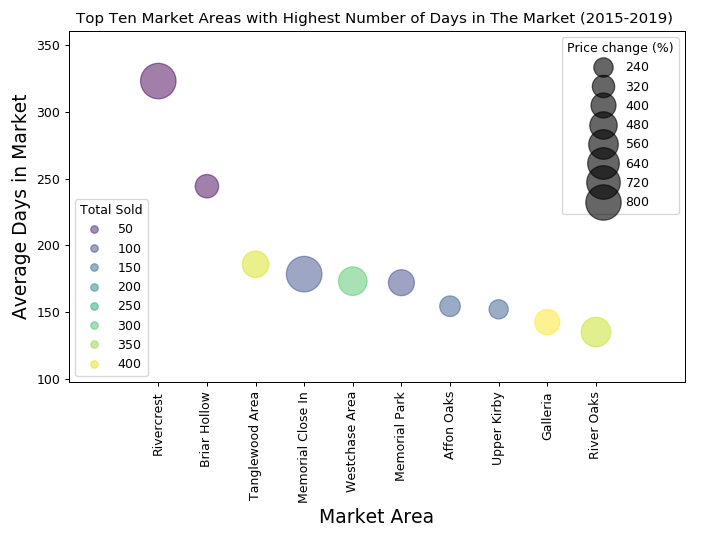

In [211]:
# PandasPlot.set_xticklabels() can be used to set the tick labels as well. It will automatically only take numerical columns.
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

x_axis = More_days_in_Market_df1["Market Area"]
y_axis = More_days_in_Market_df1["Average Days in Market"]
size = (More_days_in_Market_df1["percent_change"]*100)
labels = ['Rivercrest', 'Briar Hollow', 'Tanglewood Area', 'Memorial Close In', 'Westchase Area', 'Memorial Park', 'Affon Oaks', 'Upper Kirby', 'Galleria', 'River Oaks']
total= (More_days_in_Market_df1["Total Sold"]*1)

fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(x_axis, y_axis, marker="o", s=size, c=total, alpha=0.5)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Total Sold")
ax.add_artist(legend1)
# produce a legend with a cross section of sizes from the scatter
handles, legend = scatter.legend_elements(prop="sizes", alpha=0.6)
legend = ax.legend(handles, legend,  loc="Best", title="Price change (%)")
plt.xticks(x_axis, labels, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.1)
#plt.grid(True)
ax.set_xlabel("Market Area", fontsize=15)
ax.set_ylabel("Average Days in Market", fontsize=15)
ax.set_title("Top Ten Market Areas with Highest Number of Days in The Market (2015-2019) ")
fig.tight_layout()
plt.savefig("More_days_in_Market.png")
plt.show()


<IPython.core.display.Javascript object>


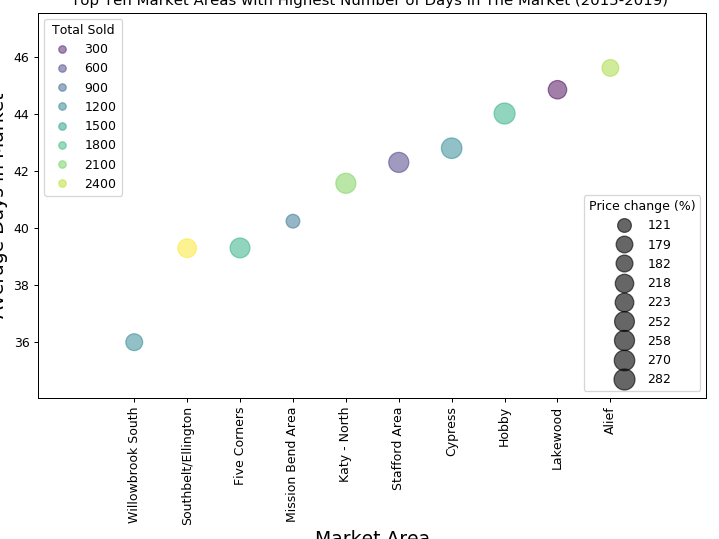

In [188]:


x_axis1 = Less_days_in_Market_df["Market Area"]
y_axis1 = Less_days_in_Market_df["Average Days in Market"]
size1 = (Less_days_in_Market_df["percent_change"]*100)
total1= (Less_days_in_Market_df["Total Sold"]*1)
labels1 = ['Willowbrook South', 'Southbelt/Ellington', 'Five Corners', 'Mission Bend Area', 'Katy - North', 'Stafford Area', 'Cypress', 'Hobby', 'Lakewood', 'Alief']

fig, ax = plt.subplots(figsize=(8,6))
scatter1=ax.scatter(x_axis1, y_axis1, marker="o", s=size1, c=total1, alpha=0.5)
#scatter1=ax.scatter(x_axis1, y_axis1, marker="o", s=size1, facecolors="blue", edgecolors="blue", alpha=0.5)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter1.legend_elements(),
                    loc="upper left", title="Total Sold")
ax.add_artist(legend1)
# produce a legend with a cross section of sizes from the scatter
handles2, legend2 = scatter1.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles2, legend2,  loc="lower right", title="Price change (%)")

plt.xticks(x_axis1, labels1, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.5)
fig.tight_layout()

ax.set_xlabel("Market Area", fontsize=15)
ax.set_ylabel("Average Days in Market", fontsize=15)
ax.set_title("Top Ten Market Areas with Highest Number of Days in The Market (2015-2019) ")
plt.savefig("Less_days_in_Market.png")
plt.show()

In [ ]:

x_axis1 = Less_days_in_Market_df["Market Area"]
y_axis1 = Less_days_in_Market_df["Average Days in Market"]
size1 = (Less_days_in_Market_df["percent_change"]*100)
total1= (Less_days_in_Market_df["Total Sold"]*10)
labels1 = ['Willowbrook South', 'Southbelt/Ellington', 'Five Corners', 'Mission Bend Area', 'Katy - North', 'Stafford Area', 'Cypress', 'Hobby', 'Lakewood', 'Alief']


<IPython.core.display.Javascript object>


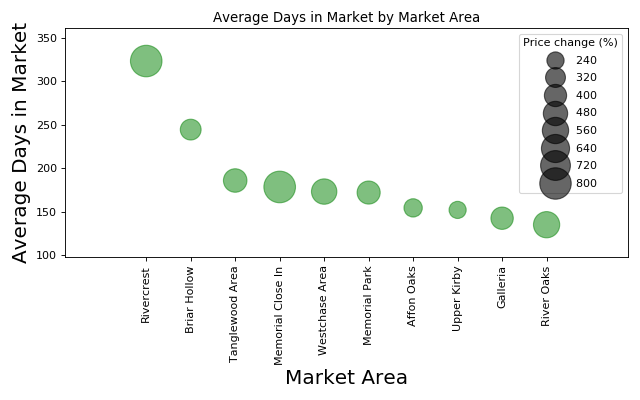

<IPython.core.display.Javascript object>


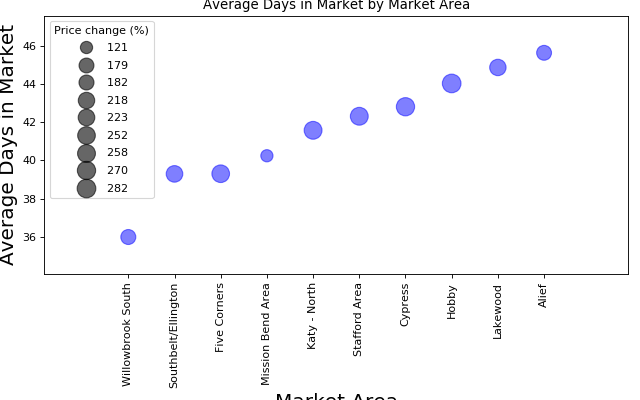

In [135]:
x_axis = More_days_in_Market_df1["Market Area"]
y_axis = More_days_in_Market_df1["Average Days in Market"]
size = (More_days_in_Market_df1["percent_change"]*100)
labels = ['Rivercrest', 'Briar Hollow', 'Tanglewood Area', 'Memorial Close In', 'Westchase Area', 'Memorial Park', 'Affon Oaks', 'Upper Kirby', 'Galleria', 'River Oaks']
total= (More_days_in_Market_df["Total Sold"]*10)

x_axis1 = Less_days_in_Market_df["Market Area"]
y_axis1 = Less_days_in_Market_df["Average Days in Market"]
size1 = (Less_days_in_Market_df["percent_change"]*100)
total1= (Less_days_in_Market_df["Total Sold"]*10)
labels1 = ['Willowbrook South', 'Southbelt/Ellington', 'Five Corners', 'Mission Bend Area', 'Katy - North', 'Stafford Area', 'Cypress', 'Hobby', 'Lakewood', 'Alief']

fig, ax = plt.subplots(figsize=(8,5))
#fig, ax = plt.subplots()
scatter = ax.scatter(x_axis, y_axis, marker="o", s=size, facecolors="green", edgecolors="green", alpha=0.5)
#scatter = ax.scatter(x_axis, y_axis, marker="o", s=size, c=total, alpha=0.5)
# produce a legend with the unique colors from the scatter
#legend1 = ax.legend(*scatter.legend_elements(),
#                    loc="upper right", title="Close Price")
#ax.add_artist(legend1)
# produce a legend with a cross section of sizes from the scatter
handles, legend = scatter.legend_elements(prop="sizes", alpha=0.6)
legend = ax.legend(handles, legend,  loc="Best", title="Price change (%)")

plt.xticks(x_axis, labels, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.1)
#plt.grid(True)
ax.set_xlabel("Market Area", fontsize=18)
ax.set_ylabel("Average Days in Market", fontsize=18)
ax.set_title("Average Days in Market by Market Area")
fig.tight_layout()
plt.savefig("More_days_in_Market.png")
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
#scatter1=ax.scatter(x_axis1, y_axis1, marker="o", s=size1, c=total1, alpha=0.5)
scatter1=ax.scatter(x_axis1, y_axis1, marker="o", s=size1, facecolors="blue", edgecolors="blue", alpha=0.5)
# produce a legend with the unique colors from the scatter
#legend1 = ax.legend(*scatter1.legend_elements(),
#                    loc="upper right", title="Total sold")
#ax.add_artist(legend1)
# produce a legend with a cross section of sizes from the scatter
handles2, legend2 = scatter1.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles2, legend2,  loc="Best", title="Price change (%)")

plt.xticks(x_axis1, labels1, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.5)
fig.tight_layout()

ax.set_xlabel("Market Area", fontsize=18)
ax.set_ylabel("Average Days in Market", fontsize=18)
ax.set_title("Average Days in Market by Market Area")
plt.savefig("Less_days_in_Market.png")
plt.show()

In [76]:
# Break the dataset per year. 


